<h1>Comparar 3 algoritmos de agrupamiento en una matriz un poco mas compleja.</h1>

In [1]:
#Importar las librerias que nos van a ayudar aplicar los algortmos.
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#leer los datos.
matriz = pd.read_csv("alcol.csv", index_col="Indice")

In [3]:
#Revisemos la matriz que hayamos subido. 
print("\nTamaño de la matriz: \n ", matriz.shape )
print("\nPrimeras filas de la matriz: \n ",  matriz.head() )
#Cuantificar la cantidad de datos perdidos para determinar si los eliminamos, rellenamos, etc.
print("\nCantidad de datos faltantes: \n ", matriz.isnull().sum()  )
print("\nCantidad de datos faltantes en porcentaje \n", matriz.isnull().sum()/matriz.shape[0]*100)
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() )


Tamaño de la matriz: 
  (395, 33)

Primeras filas de la matriz: 
         school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
Indice                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
Indice  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3   

In [4]:
#Separemos las columnas numericas de las categoricas. Como lo índica la matriz.
columnas_categoricas = matriz.select_dtypes("object")
columnas_numericas = matriz.select_dtypes(np.number)
print("\nVariables numericas: \n ", columnas_numericas.columns )
print("\nVariables categoricas: \n ", columnas_categoricas.columns )

# Hay un módulo que nos ayuda a realizar esta acción.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#Hay que mirar como quedan las variable categoricas codificadas.
for columna in columnas_categoricas:
    print('\nNombre de la columna:', "\n", columna)    
    matriz[columna] = matriz[[columna]].apply(encoder.fit_transform)
    for i in range(len(encoder.classes_)):
        print(encoder.classes_[i],':', i)


#Aquí verificamos como todas las varibales ahora son numericas, tanto numeros enteros como continuos.
#Revisar los tipos de variables y determinar si son correctas o las modifcamos.
print("\nTipos de variables: \n ", matriz.info() )
#Revisar algunas estadisticas basicas.
print("\nEstadisticas basicas: \n ", matriz.describe() )


Variables numericas: 
  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

Variables categoricas: 
  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Nombre de la columna: 
 school
GP : 0
MS : 1

Nombre de la columna: 
 sex
F : 0
M : 1

Nombre de la columna: 
 address
R : 0
U : 1

Nombre de la columna: 
 famsize
GT3 : 0
LE3 : 1

Nombre de la columna: 
 Pstatus
A : 0
T : 1

Nombre de la columna: 
 Mjob
at_home : 0
health : 1
other : 2
services : 3
teacher : 4

Nombre de la columna: 
 Fjob
at_home : 0
health : 1
other : 2
services : 3
teacher : 4

Nombre de la columna: 
 reason
course : 0
home : 1
other : 2
reputation : 3

Nombre de la columna: 
 guardian
father : 0
mother : 

array([[<AxesSubplot:title={'center':'school'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'famsize'}>,
        <AxesSubplot:title={'center':'Pstatus'}>],
       [<AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'Mjob'}>,
        <AxesSubplot:title={'center':'Fjob'}>,
        <AxesSubplot:title={'center':'reason'}>,
        <AxesSubplot:title={'center':'guardian'}>],
       [<AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'famsup'}>,
        <AxesSubplot:title={'center':'paid'}>],
       [<AxesSubplot:title={'center':'activities'}>,
        <AxesSubplot:title={'center':'nursery'}>,
        <Ax

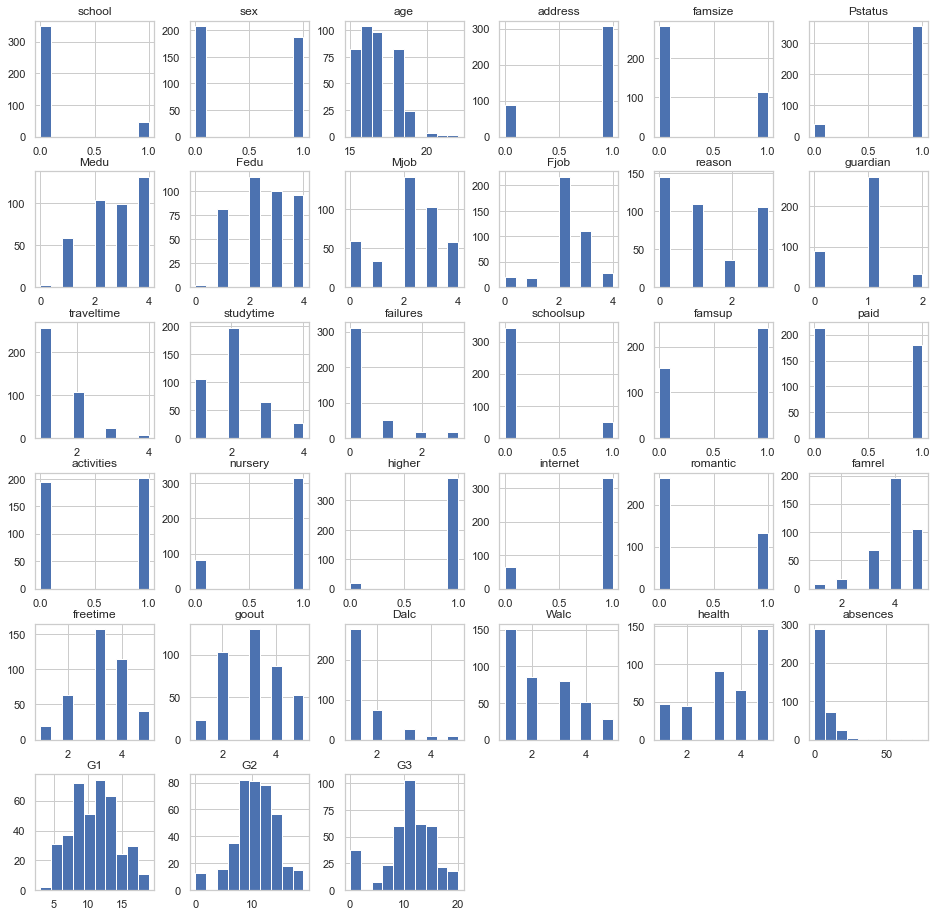

In [7]:
#Mirar la forma de las variables nos ayuda a percibir ciertas cosas como si la curva es normal, el sesgo, estacionalidad en 
#los casos de series de tiempo, correlación etc. 
matriz.hist( figsize=(16,16) )

In [9]:
#Primero hay que centrar los datos para que elalgoritmo de pca funcione optimamente.
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
for columna in matriz.columns:
    matriz[columna] = scalar.fit_transform(matriz[[columna]])
print("\nMatriz con datos dentrados: \n ", matriz.head(2) )
print("\nTipos de variables de la nueva matriz con datos centrados: \n ", matriz.info())


#Bueno reduzcamos la matriz con PCA para poder utilizar solo dos columnas.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(matriz.values)
pcaEscalarReducido = pca.transform(matriz.values)
print("Dimensiones originales: {}".format(str(matriz.shape)))
print("Dimensiones reducidas: {}".format(str(pcaEscalarReducido.shape)))
matriz_pca = pd.DataFrame (pcaEscalarReducido , columns=["pc1","pc2"])
print("\nMatriz reducida por medio de pca: \n ", matriz_pca.head(2) )
print("\nTipos de variables de la nueva matriz con pca: \n ", matriz_pca.info())


Matriz con datos dentrados: 
           school       sex       age   address   famsize   Pstatus      Medu  \
Indice                                                                        
0      -0.36305 -0.948176  1.023046  0.535392 -0.636941 -2.938392  1.143856   
1      -0.36305 -0.948176  0.238380  0.535392 -0.636941  0.340322 -1.600009   

            Fedu      Mjob      Fjob  ...    famrel  freetime     goout  \
Indice                                ...                                 
0       1.360371 -1.769793  1.993149  ...  0.062194  -0.23601  0.801479   
1      -1.399970 -1.769793 -0.325831  ...  1.178860  -0.23601 -0.097908   

            Dalc      Walc    health  absences        G1        G2        G3  
Indice                                                                        
0      -0.540699 -1.003789 -0.399289  0.036424 -1.782467 -1.254791 -0.964934  
1      -0.540699 -1.003789 -0.399289 -0.213796 -1.782467 -1.520979 -0.964934  

[2 rows x 33 columns]
<class 'pan

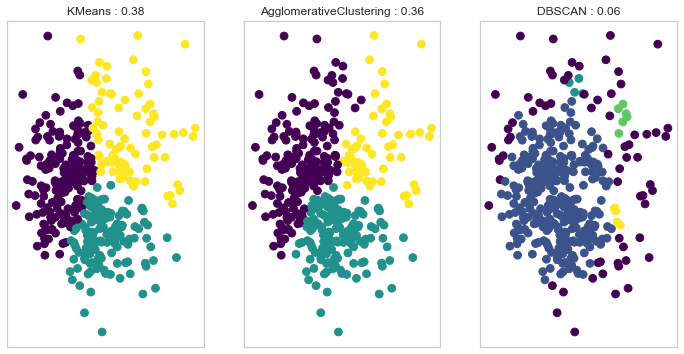

In [11]:
#Apliquemos los algoritmos a esa matriz.
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
fig, axes = plt.subplots(1, 3, figsize=(12, 6),subplot_kw={'xticks': (), 'yticks': ()})
algoritmos = [KMeans(n_clusters=3), AgglomerativeClustering(n_clusters=3),DBSCAN()]
for ax, algoritmo in zip(axes, algoritmos):
    grupos = algoritmo.fit_predict(matriz_pca)
    df_grupos = pd.DataFrame( grupos, columns= ["Categorias"])
    df_matriz = pd.merge(matriz_pca, df_grupos, left_index= True, right_index= True, how = "inner")
    df_matriz.to_csv("alcol_{}.csv".format(algoritmo))
    ax.scatter(matriz_pca.iloc[:, 0], matriz_pca.iloc[:, 1], c=grupos, cmap="viridis", s=60)
    ax.set_title("{} : {:.2f}".format(algoritmo.__class__.__name__,silhouette_score(matriz_pca, grupos)))
